# Werid Shape of Data

In [45]:
import numpy as np

def generate_even_spaced_points_circle(radius, num_points):
    """
    Generate evenly spaced points around a circle.

    :param radius: The radius of the circle
    :param num_points: The number of points to generate
    :return: A list of tuples representing the (x, y) coordinates of the points
    """
    points = []
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    
    for angle in angles:
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        points.append((x, y))
    
    return points

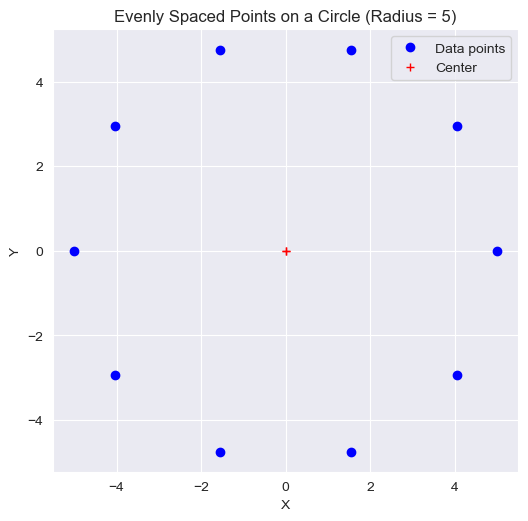

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
radius = 5
num_points = 10

# Generate the points
points = generate_even_spaced_points_circle(radius, num_points)

# Plotting the points
x_vals, y_vals = zip(*points)

plt.figure(figsize=(6,6))
plt.plot(x_vals, y_vals, 'bo', label="Data points")  # Plot points as blue circles
plt.plot([0, 0], [0, 0], 'r+', label="Center")  # Mark center of the circle
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title(f"Evenly Spaced Points on a Circle (Radius = {radius})")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [47]:
import math

def generate_even_spaced_points_circle_no_float(radius, num_points):
    """
    Generate evenly spaced points around a circle without data loss due to rounding errors.

    :param radius: The radius of the circle
    :param num_points: The number of points to generate
    :return: A list of tuples representing the (x, y) coordinates of the points
    """
    points = []
    for i in range(num_points):
        # Calculate the angle as a fraction of 2π
        angle = (2 * math.pi * i) / num_points
        
        # Use cosine and sine to calculate x, y coordinates
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        # Append to points list
        points.append((x, y))
    
    return points

# Example usage:
# Uncomment below line to generate 10 points around a circle of radius 5
# points = generate_even_spaced_points_circle_no_float(5, 10)
# print(points)


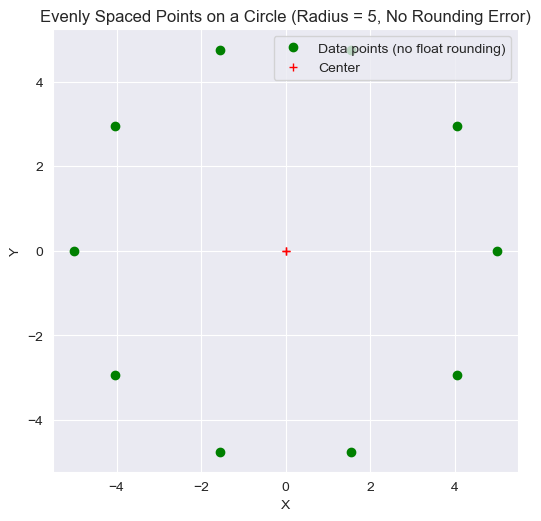

In [48]:
# Generate the points using the math module-based function
points_no_float = generate_even_spaced_points_circle_no_float(radius, num_points)

# Plotting the points generated with the math module to avoid rounding errors
x_vals_no_float, y_vals_no_float = zip(*points_no_float)

plt.figure(figsize=(6,6))
plt.plot(x_vals_no_float, y_vals_no_float, 'go', label="Data points (no float rounding)")  # Plot points as green circles
plt.plot([0, 0], [0, 0], 'r+', label="Center")  # Mark center of the circle
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title(f"Evenly Spaced Points on a Circle (Radius = {radius}, No Rounding Error)")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


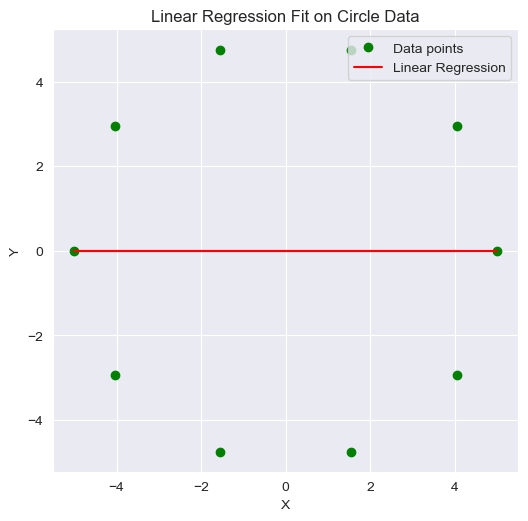

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
x_vals_np = np.array(x_vals_no_float).reshape(-1, 1)  # Reshape for sklearn
y_vals_np = np.array(y_vals_no_float)

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(x_vals_np, y_vals_np)

# Generate predictions
y_pred = linear_model.predict(x_vals_np)

# Plot original data points and the regression line
plt.figure(figsize=(6,6))
plt.plot(x_vals_no_float, y_vals_no_float, 'go', label="Data points")  # Plot original points
plt.plot(x_vals_np, y_pred, 'r-', label="Linear Regression")  # Plot regression line
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title(f"Linear Regression Fit on Circle Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


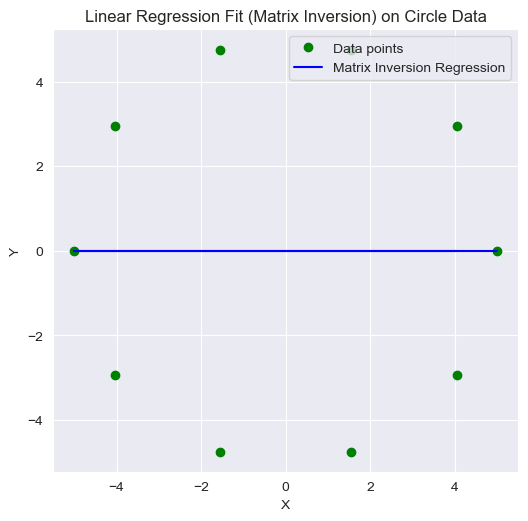

In [50]:
# Prepare the design matrix X by adding a column of ones for the intercept
X_matrix = np.hstack([x_vals_np, np.ones((x_vals_np.shape[0], 1))])

# Calculate the normal equation: theta = (X^T X)^{-1} X^T y
theta = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ y_vals_np)

# Extract the slope and intercept
slope, intercept = theta

# Generate predictions using the slope and intercept
y_pred_matrix = X_matrix @ theta

# Plot original data points and the regression line from matrix inversion
plt.figure(figsize=(6,6))
plt.plot(x_vals_no_float, y_vals_no_float, 'go', label="Data points")  # Plot original points
plt.plot(x_vals_np, y_pred_matrix, 'b-', label="Matrix Inversion Regression")  # Plot regression line
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title(f"Linear Regression Fit (Matrix Inversion) on Circle Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [51]:
# The hat matrix is given by: H = X(X^T X)^{-1}X^T
# Calculate the hat matrix
hat_matrix = X_matrix.T @ X_matrix

# Calculate the condition number of the hat matrix
condition_number = np.linalg.cond(hat_matrix)

condition_number


12.499999999999998

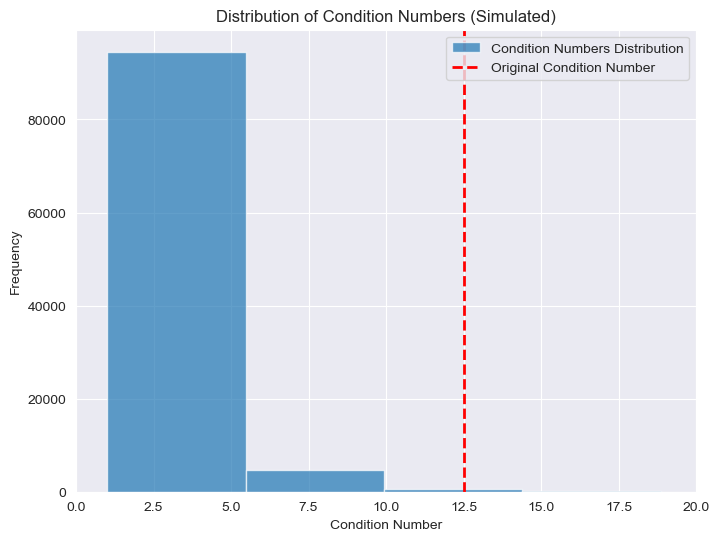

In [17]:
# Generate a random X_matrix for the simulation
np.random.seed(42)  # For reproducibility
num_simulations = 100000
condition_numbers = []

for _ in range(num_simulations):
    X_simulated = np.random.randn(X_matrix.shape[0], X_matrix.shape[1])
    hat_matrix_simulated = X_simulated.T @ X_simulated
    condition_number_simulated = np.linalg.cond(hat_matrix_simulated)
    condition_numbers.append(condition_number_simulated)

# Plot the distribution of the condition numbers
plt.figure(figsize=(8,6))
plt.hist(condition_numbers, bins=50, alpha=0.7, label="Condition Numbers Distribution")
plt.axvline(condition_number, color='r', linestyle='dashed', linewidth=2, label="Original Condition Number")
plt.title("Distribution of Condition Numbers (Simulated)")
plt.xlabel("Condition Number")
plt.ylabel("Frequency")
plt.xlim(0, 20)
plt.legend()
plt.grid(True)
plt.show()

# Adding Circle

In [19]:
def generate_two_sets_of_points_circle(radius, num_points, theta_offset):
    """
    Generate two sets of evenly spaced points on the same circle, 
    with a second set offset by an angle theta.
    
    :param radius: The radius of the circle
    :param num_points: The number of points to generate for each set
    :param theta_offset: The angle (in radians) to offset the second set of points
    :return: Two lists of tuples representing the (x, y) coordinates of the points
    """
    points_set_1 = []
    points_set_2 = []
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    
    for angle in angles:
        # First set: Standard points
        x1 = radius * np.cos(angle)
        y1 = radius * np.sin(angle)
        points_set_1.append((x1, y1))
        
        # Second set: Offset points by theta
        x2 = radius * np.cos(angle + theta_offset)
        y2 = radius * np.sin(angle + theta_offset)
        points_set_2.append((x2, y2))
    
    return points_set_1, points_set_2

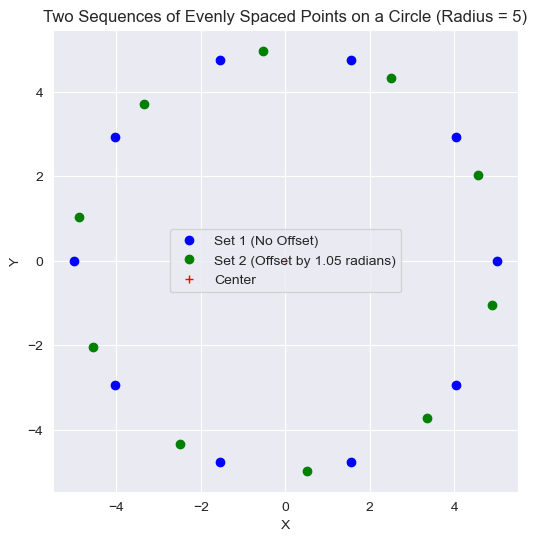

In [21]:

# Parameters
radius = 5
num_points = 10
theta_offset = np.pi / 3  # 45 degrees offset for the second set

# Generate the points for both sets
points_set_1, points_set_2 = generate_two_sets_of_points_circle(radius, num_points, theta_offset)

# Extract x and y values for plotting
x_vals_set_1, y_vals_set_1 = zip(*points_set_1)
x_vals_set_2, y_vals_set_2 = zip(*points_set_2)

# Plotting the two sets of points on the same circle
plt.figure(figsize=(6,6))
plt.plot(x_vals_set_1, y_vals_set_1, 'bo', label="Set 1 (No Offset)")  # First set of points in blue
plt.plot(x_vals_set_2, y_vals_set_2, 'go', label=f"Set 2 (Offset by {theta_offset:.2f} radians)")  # Second set in green
plt.plot([0, 0], [0, 0], 'r+', label="Center")  # Mark center of the circle
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title(f"Two Sequences of Evenly Spaced Points on a Circle (Radius = {radius})")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [23]:
# Adjusting the calculation as per request: using X_combined.T @ X_combined for the matrix

# Prepare data for 3D plot with the new calculation
theta_values = np.linspace(0, 2 * np.pi, 50)  # Different angles for theta offset
condition_numbers = []

# For each theta, calculate the condition number
for theta_offset in theta_values:
    points_set_1, points_set_2 = generate_two_sets_of_points_circle(radius, num_points, theta_offset)
    
    # Combine both sets of points into a single matrix for regression
    combined_x_vals = np.array(list(zip(*points_set_1 + points_set_2))[0]).reshape(-1, 1)
    combined_y_vals = np.array(list(zip(*points_set_1 + points_set_2))[1])
    
    # Create the design matrix
    X_combined = np.hstack([combined_x_vals, np.ones((combined_x_vals.shape[0], 1))])
    
    # Calculate the condition number of X_combined.T @ X_combined
    try:
        matrix_combined = X_combined.T @ X_combined
        condition_number_combined = np.linalg.cond(matrix_combined)
    except np.linalg.LinAlgError:
        condition_number_combined = np.inf  # Handle singular matrices
    
    condition_numbers.append(condition_number_combined)

# Correct the points index and meshgrid for plotting
points_index = np.arange(1, num_points + 1)  # One set of points' index only

# Adjust the condition numbers mesh to fit the number of points in each set
condition_numbers_mesh = np.tile(condition_numbers, (num_points, 1))


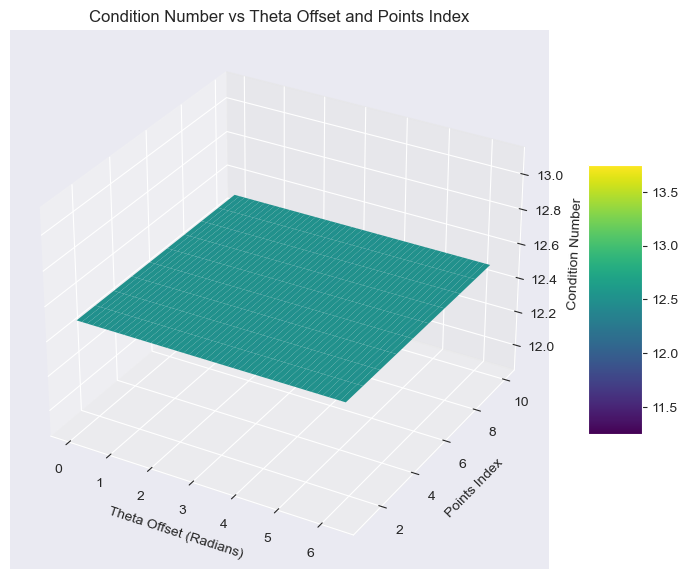

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Create an interactive 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid for theta and points
theta_mesh, points_mesh = np.meshgrid(theta_values, points_index)

# Plot the surface
surf = ax.plot_surface(theta_mesh, points_mesh, condition_numbers_mesh, cmap=cm.viridis, edgecolor='none')

# Add labels and color bar
ax.set_xlabel('Theta Offset (Radians)')
ax.set_ylabel('Points Index')
ax.set_zlabel('Condition Number')
ax.set_title('Condition Number vs Theta Offset and Points Index')

fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar for reference
plt.show()


In [27]:
# Redefining the single set of points generation and using pseudo-inverse for matrix inversion
def calculate_condition_number_with_pseudo_inverse(radius, num_points):
    """
    Generate evenly spaced points on a circle and compute the condition number using pseudo-inverse.
    
    :param radius: The radius of the circle
    :param num_points: Number of evenly spaced points to generate
    :return: Condition number using pseudo-inverse
    """
    # Generate the points
    points = generate_even_spaced_points_circle_no_float(radius, num_points)
    
    # Prepare the design matrix X
    x_vals, y_vals = zip(*points)
    x_vals_np = np.array(x_vals).reshape(-1, 1)
    y_vals_np = np.array(y_vals)
    
    X_matrix = np.hstack([x_vals_np, np.ones((x_vals_np.shape[0], 1))])  # Design matrix

    # Calculate the pseudo-inverse of X^T X
    pseudo_inverse_matrix = np.linalg.pinv(X_matrix.T @ X_matrix)
    
    # Compute the condition number of X^T X using pseudo-inverse
    condition_number = np.linalg.cond(pseudo_inverse_matrix)
    
    return condition_number

# Calculate the condition number using the pseudo-inverse
condition_number_pseudo_inverse = calculate_condition_number_with_pseudo_inverse(radius, num_points)

condition_number_pseudo_inverse


12.5

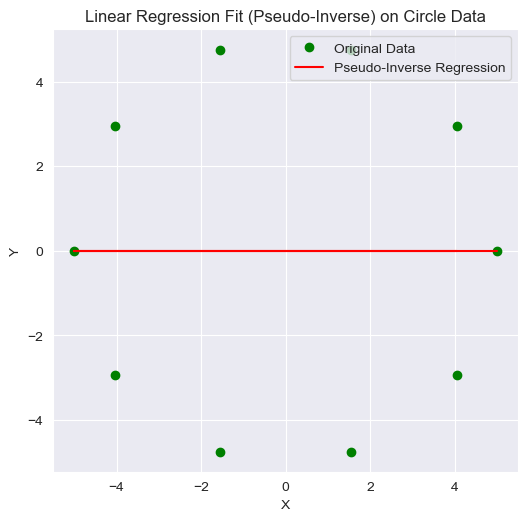

12.499999999999998

In [28]:
# Redefine the linear regression with pseudo-inverse
def linear_regression_with_pseudo_inverse(x_vals, y_vals):
    """
    Perform linear regression using pseudo-inverse to handle ill-conditioned matrices.
    
    :param x_vals: Array of x-values (features)
    :param y_vals: Array of y-values (targets)
    :return: Predicted y values based on the linear regression and the condition number
    """
    # Prepare the design matrix X
    X_matrix = np.hstack([x_vals.reshape(-1, 1), np.ones((x_vals.shape[0], 1))])  # Design matrix
    
    # Calculate pseudo-inverse of X^T X
    pseudo_inverse_matrix = np.linalg.pinv(X_matrix.T @ X_matrix)
    
    # Calculate theta using pseudo-inverse
    theta_pseudo_inverse = pseudo_inverse_matrix @ X_matrix.T @ y_vals
    
    # Predict y values based on the fitted model
    y_pred = X_matrix @ theta_pseudo_inverse
    
    # Calculate condition number of X^T X
    condition_number = np.linalg.cond(X_matrix.T @ X_matrix)
    
    return y_pred, condition_number

# Generate the points (circle data)
points = generate_even_spaced_points_circle_no_float(radius, num_points)
x_vals, y_vals = zip(*points)

# Convert to numpy arrays
x_vals_np = np.array(x_vals)
y_vals_np = np.array(y_vals)

# Perform linear regression using pseudo-inverse
y_pred_pseudo_inverse, condition_number_pseudo_inverse_regression = linear_regression_with_pseudo_inverse(x_vals_np, y_vals_np)

# Plot original data and the pseudo-inverse regression line
plt.figure(figsize=(6,6))
plt.plot(x_vals_np, y_vals_np, 'go', label="Original Data")  # Plot original points
plt.plot(x_vals_np, y_pred_pseudo_inverse, 'r-', label="Pseudo-Inverse Regression")  # Regression line
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.title("Linear Regression Fit (Pseudo-Inverse) on Circle Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Display the condition number for the regression
condition_number_pseudo_inverse_regression


In [30]:
import numpy as np

def create_singular_matrix_data(num_data_points, num_features):
    """
    Creates a dataset where the number of features exceeds the number of data points,
    resulting in a singular matrix.
    
    :param num_data_points: The number of data points (rows)
    :param num_features: The number of features (columns)
    :return: A design matrix X that is singular
    """
    # Create a random matrix with more features than data points
    X = np.random.randn(num_data_points, num_features)
    
    # Intentionally make it rank deficient (singular) by making some columns linear combinations of others
    X[:, -1] = X[:, 0] + X[:, 1]  # Make the last column a linear combination of the first two
    
    return X

# Example usage:
num_data_points = 3
num_features = 5

# Generate the singular design matrix
X_singular = create_singular_matrix_data(num_data_points, num_features)

In [31]:
# Calculate the condition number of the singular matrix
condition_number_singular = np.linalg.cond(X_singular)

In [32]:
condition_number_singular

6.0564782895183855

In [33]:
# Simulate the condition number for random matrices with the same shape
np.random.seed(42)  # For reproducibility
num_simulations = 10000
condition_numbers = []

for _ in range(num_simulations):
    X_simulated = np.random.randn(num_data_points, num_features)
    X_simulated[:, -1] = X_simulated[:, 0] + X_simulated[:, 1]  # Make the last column a linear combination of the first two
    condition_number_simulated = np.linalg.cond(X_simulated)
    condition_numbers.append(condition_number_simulated)


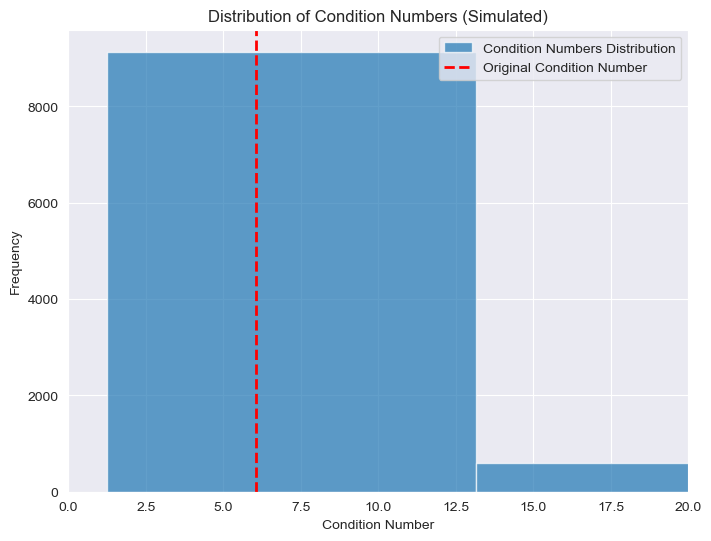

In [35]:
# Plot the distribution of the condition numbers
plt.figure(figsize=(8,6))
plt.hist(condition_numbers, bins=50, alpha=0.7, label="Condition Numbers Distribution")
plt.axvline(condition_number_singular, color='r', linestyle='dashed', linewidth=2, label="Original Condition Number")

plt.title("Distribution of Condition Numbers (Simulated)")
plt.xlabel("Condition Number")
plt.xlim(0, 20)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Create a singular matrix with more features than data points
X_singular = create_singular_matrix_data(num_data_points, num_features)

# Generate random target values
y_singular = np.random.randn(num_data_points)

# Perform linear regression using pseudo-inverse to handle the singularity
def linear_regression_on_singular_matrix(X, y):
    """
    Perform linear regression on a singular matrix using the pseudo-inverse.
    
    :param X: The design matrix (singular)
    :param y: The target values
    :return: Predicted y values and the condition number of X^T X
    """
    # Calculate pseudo-inverse of X^T X
    pseudo_inverse_matrix = np.linalg.pinv(X.T @ X)
    
    # Calculate theta using pseudo-inverse
    theta_pseudo_inverse = pseudo_inverse_matrix @ X.T @ y
    
    # Predict y values based on the fitted model
    y_pred = X @ theta_pseudo_inverse
    
    # Calculate condition number of X^T X
    condition_number = np.linalg.cond(X.T @ X)
    
    return y_pred, condition_number

# Perform linear regression on the singular matrix
y_pred_singular, condition_number_singular = linear_regression_on_singular_matrix(X_singular, y_singular)

# Display the results
y_pred_singular, condition_number_singular


(array([ 0.81417826, -0.52847784,  0.48916182]), 2.2952719240460296e+16)

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Step 1: Create synthetic data with multicollinearity
np.random.seed(42)
n_samples = 100
n_features = 5

# Creating independent features
X_singular = np.random.rand(n_samples, n_features - 1) * 10

# Creating a dependent feature (introducing multicollinearity)
X_singular = np.hstack([X_singular, X_singular[:, 0].reshape(-1, 1) * 2 + X_singular[:, 1].reshape(-1, 1) * 3])

# Coefficients and noise
coeffs = np.array([2.5, -1.7, 3.1, 0.9, 1.2])
noise = np.random.randn(n_samples) * 0.5

# Creating the response variable with some noise
y_singular = X_singular.dot(coeffs) + noise

# Step 2: Perform Linear Regression on the original data
lr_singular_model = LinearRegression()
lr_singular_model.fit(X_singular, y_singular)
y_singular_pred = lr_singular_model.predict(X_singular)

# Step 3: Apply PCA to reduce dimensionality
pca_singular = PCA()
X_pca_singular = pca_singular.fit_transform(X_singular)

# Perform Linear Regression on PCA components
lr_pca_singular_model = LinearRegression()
lr_pca_singular_model.fit(X_pca_singular, y_singular)
y_pca_singular_pred = lr_pca_singular_model.predict(X_pca_singular)

# Step 4: Compare the results
mse_singular_original = mean_squared_error(y_singular, y_singular_pred)
mse_singular_pca = mean_squared_error(y_singular, y_pca_singular_pred)

# Inverse process: Reconstructing X from PCA components
X_pca_singular_reconstructed = pca_singular.inverse_transform(X_pca_singular)

# Calculating reconstruction error from PCA
reconstruction_error_singular_pca = np.mean(np.abs(X_singular - X_pca_singular_reconstructed))

# Results
results = {
    "MSE_Singular_Original_Regression": mse_singular_original,
    "MSE_Singular_PCA_Regression": mse_singular_pca,
    "Reconstruction_Error_Singular_PCA": reconstruction_error_singular_pca
}

print(results)


{'MSE_Singular_Original_Regression': 0.19140555994130445, 'MSE_Singular_PCA_Regression': 0.1913918965540315, 'Reconstruction_Error_Singular_PCA': 1.247890679678676e-15}


/Users/jamesguan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x800 with 0 Axes>

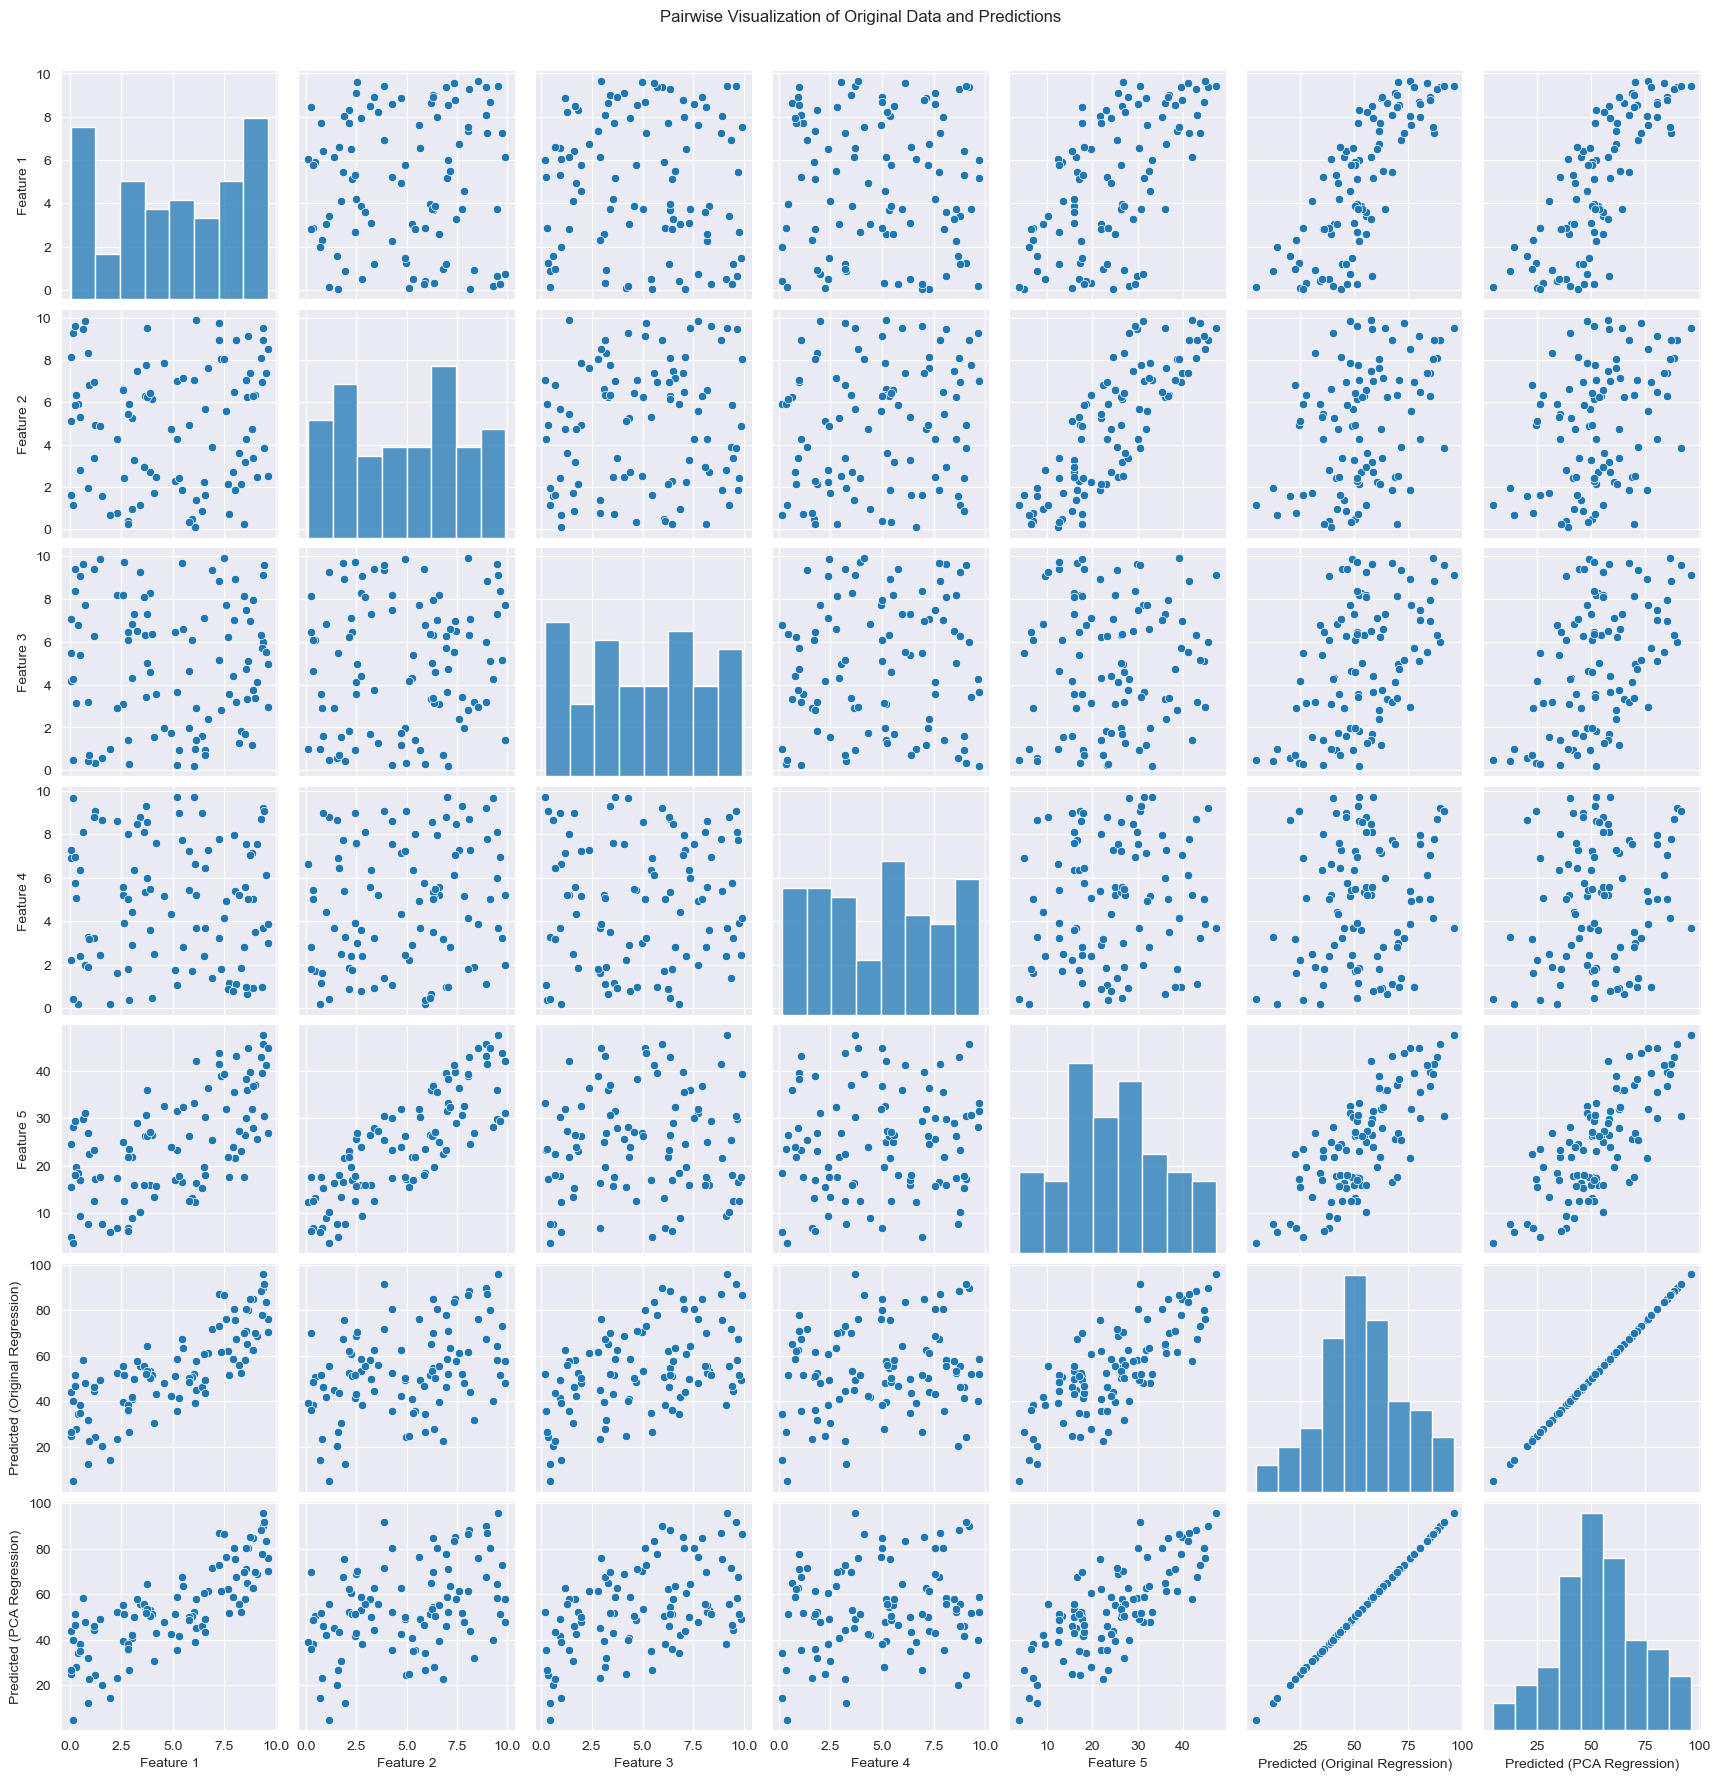

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# To visualize pairwise fitting, we can focus on comparing the original features with their predicted values.
# For simplicity, we will focus on the first 2 features and their predicted values from the models.

# Create a DataFrame to store the original and predicted values
df = pd.DataFrame({
    'Feature 1': X_singular[:, 0],
    'Feature 2': X_singular[:, 1],
    'Feature 3': X_singular[:, 2],
    'Feature 4': X_singular[:, 3],
    'Feature 5': X_singular[:, 4],
    'Predicted (Original Regression)': y_singular_pred,
    'Predicted (PCA Regression)': y_pca_singular_pred
})

# Pairplot for visualizing the original data, and regression predictions

# fig size smaller
plt.figure(figsize=(8, 8))

sns.pairplot(df)
plt.suptitle("Pairwise Visualization of Original Data and Predictions", y=1.02)
plt.show()


In [ ]:
# Implementation of the orthogonalization algorithm described in the image
def orthogonal_regression(X, y):
    # Step 1: Initialize
    n_samples, n_features = X.shape
    Z = np.zeros_like(X)
    Z[:, 0] = 1  # z0 = 1 (constant term)
    gamma = np.zeros((n_features, n_features))  # For storing the coefficients

    # Step 2: Iterate over features to compute orthogonal projections
    for j in range(1, n_features):
        for ell in range(j):
            # Compute coefficients γ_{ℓj}
            gamma[ell, j] = np.dot(Z[:, ell], X[:, j]) / np.dot(Z[:, ell], Z[:, ell])
        
        # Compute residual vector z_j
        Z[:, j] = X[:, j]
        for k in range(j):
            Z[:, j] -= gamma[k, j] * Z[:, k]

    # Step 3: Univariate regression of y on z_p (the last residual vector Z[:, -1])
    lr = LinearRegression()
    lr.fit(Z[:, -1].reshape(-1, 1), y)
    
    # The coefficient of z_p in this regression is the multivariate coefficient for the final feature
    beta_p = lr.coef_[0]
    intercept = lr.intercept_
    
    return beta_p, intercept, gamma, Z

# Applying this orthogonal regression algorithm to our previously created data (X_singular and y_singular)
beta_p, intercept, gamma, Z = orthogonal_regression(X_singular, y_singular)

# Displaying the results
beta_p, intercept, gamma
